In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.callbacks import ModelCheckpoint

In [2]:
image_generator = ImageDataGenerator(
    rescale=1./255.,
    shear_range=0.1,
    zoom_range=0.3,
)
image_generator_test = ImageDataGenerator(
    rescale=1./255.
)

In [3]:
train_data = image_generator.flow_from_directory(
    'data',
    target_size=(500, 500),
    color_mode='grayscale',
    class_mode='binary',
    batch_size=50
)

Found 550 images belonging to 2 classes.


In [4]:
test_data = image_generator_test.flow_from_directory(
    'test_data',
    target_size=(500, 500),
    color_mode='grayscale',
    class_mode='binary',
    batch_size=50
)

Found 74 images belonging to 2 classes.


In [5]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(500, 500, 1)))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [6]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

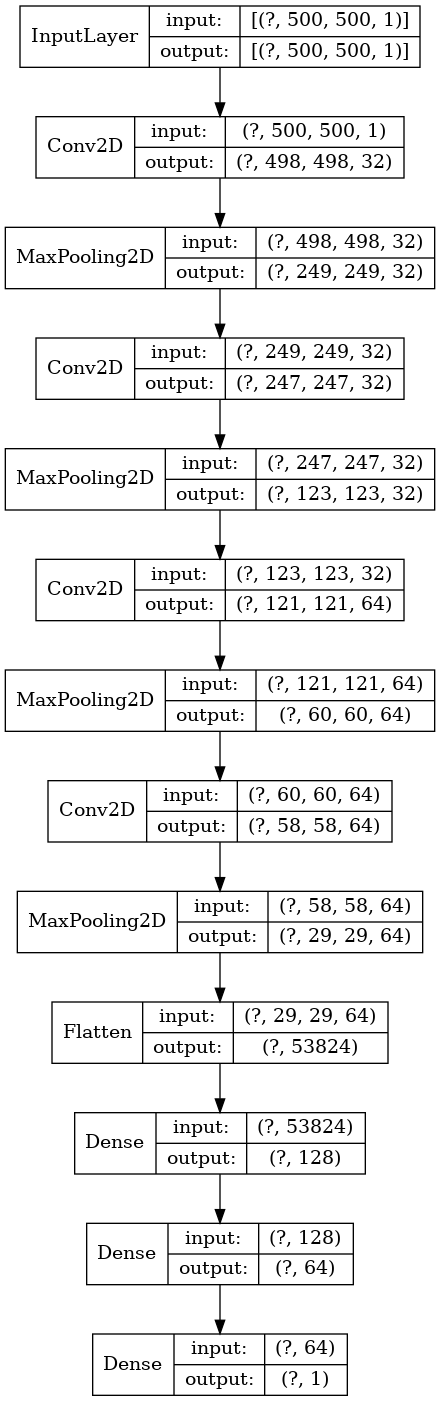

In [7]:
plot_model(model, show_shapes=True, show_layer_names=False)

In [8]:
train_data.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [9]:
compute_class_weight('balanced', np.unique(train_data.classes), train_data.classes)

/home/masoud/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass classes=[0 1], y=[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 

array([1.39593909, 0.77903683])

In [10]:
weights = compute_class_weight('balanced', np.unique(train_data.classes), train_data.classes)

In [11]:
class_weights = dict(zip(np.unique(train_data.classes), weights))

In [12]:
class_weights

{0: 1.3959390862944163, 1: 0.7790368271954674}

In [13]:
es = EarlyStopping(monitor='val_loss', mode='min', patience=3)
rlrop = ReduceLROnPlateau(monitor='val_loss', patience=2, factor=0.2, min_lr=0.001)

In [14]:
mch = ModelCheckpoint('chestxray.h5', monitor='val_loss', mode='min', save_best_only=True)

In [15]:
history = model.fit_generator(train_data, steps_per_epoch=len(train_data), epochs=30, zxc=test_data, validation_steps=len(train_data), callbacks=[es, rlrop, mch], class_weight=class_weights)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/30
11/11 [==============================] - 84s 8s/step - loss: 0.7004 - accuracy: 0.5073 - val_loss: 0.6652 - val_accuracy: 0.5541 - lr: 0.0010
Epoch 2/30
11/11 [==============================] - 84s 8s/step - loss: 0.6406 - accuracy: 0.6636 - val_loss: 0.6321 - val_accuracy: 0.6486 - lr: 0.0010
Epoch 3/30
11/11 [==============================] - 85s 8s/step - loss: 0.6030 - accuracy: 0.6745 - val_loss: 0.5525 - val_accuracy: 0.6216 - lr: 0.0010
Epoch 4/30
11/11 [==============================] - 83s 8s/step - loss: 0.6003 - accuracy: 0.6400 - val_loss: 0.5892 - val_accuracy: 0.7027 - lr: 0.0010
Epoch 5/30
11/11 [==============================] - 83s 8s/step - loss: 0.5106 - accuracy: 0.7473 - val_loss: 0.6674 - val_accuracy: 0.5811 - lr: 0.0010
Epoch 6/30
11/11 [==============================] - 83s 8s/step - loss: 0.4545 - accuracy: 0.7782 - val_loss: 0.5763 - val_accuracy: 0.6622 - lr: 0.0010


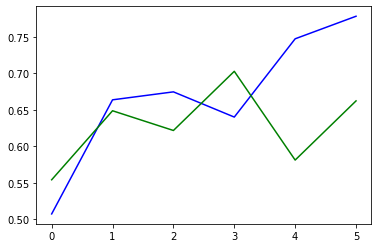

In [16]:
plt.plot(history.history['accuracy'], color='blue')
plt.plot(history.history['val_accuracy'], color='green')

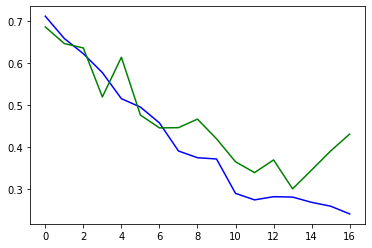

In [15]:
plt.plot(history.history['loss'], color='blue')
plt.plot(history.history['val_loss'], color='green')